This is an example notebook and is not designed to reproduce any particular result. Feel free to adapt it for your own use.

In [1]:
#import os
import matplotlib.pyplot as plt
import numpy as np
import pybamm
import pandas as pd
import timeit
start = timeit.default_timer()
#os.chdir(pybamm.__path__[0]+'/..')
# pybamm.set_logging_level("INFO")

In [2]:
model = pybamm.lithium_ion.DFN(
    options={
        "thermal": "lumped",
        "SEI": "interstitial-diffusion limited",
        "SEI on cracks": "true",
        "SEI film resistance": "distributed", 
        "SEI porosity change": "true",
        "particle mechanics": ("swelling and cracking", "swelling only"),
        "loss of active material": "stress-driven",
        "lithium plating": "partially reversible"
    }
)

In [3]:
param = pybamm.ParameterValues("OKane2023")
param.update({"Upper voltage cut-off [V]": 4.21})
param.update({"Lower voltage cut-off [V]": 2.49})
# Latest attempt at balancing; adjust as required
param.update({"Maximum concentration in negative electrode [mol.m-3]": 32544})
param.update({"Maximum concentration in positive electrode [mol.m-3]": 56598})
param.update({"Initial concentration in negative electrode [mol.m-3]": 28162})
param.update({"Initial concentration in positive electrode [mol.m-3]": 15281})
# Adjust SEI parameters
param.update({"Inner SEI lithium interstitial diffusivity [m2.s-1]": 3e-19})
# Override SEI thickness dependence of lithium plating
param.update({"Dead lithium decay rate [s-1]": 1e-6})
param.update({"Lithium plating kinetic rate constant [m.s-1]": 1e-10})
# Adjust mechanical degradation parameters
param.update({"Negative electrode cracking rate": 1e-22})
param.update({"Negative electrode LAM constant proportional term [s-1]": 1e-9})
param.update({"Positive electrode LAM constant proportional term [s-1]": 1e-9})

In [4]:
# C/10 discharge run at start and after every 100 ageing cycles 
exp = pybamm.Experiment(
    [("Hold at 4.2V until C/100", "Rest for 4 hours (5 minute period)"),] +  # Formation "cycle" run once only
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 100 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 100 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 100 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 100 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 100 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 100 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 100 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 100 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 100 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] +
    [("Discharge at 1C until 2.5V", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),] * 100 +
    [("Discharge at C/10 until 2.5V (5 minute period)", "Charge at 0.3C until 4.2V (5 minute period)", "Hold at 4.2V until C/100 (5 minute period)"),]
)

In [5]:
var_pts = {
    "x_n": 3,  # negative electrode
    "x_s": 3,  # separator 
    "x_p": 3,  # positive electrode
    "r_n": 70,  # negative particle
    "r_p": 30,  # positive particle
}

In [6]:
sim1 = pybamm.Simulation(
    model, 
    experiment=exp,
    parameter_values=param,
    solver=pybamm.CasadiSolver(),
    var_pts=var_pts,
)
solution1 = sim1.solve(
    save_at_cycles=[1,2,103,204,305,406,507,608,709,810,911,1012]  # Only save C/10 evaluation cycles to save RAM
)

stop = timeit.default_timer()
print('running time: ' + str(stop - start) +'s')

At t = 0.00532041 and h = 8.63248e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00523885 and h = 3.20015e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00515855 and h = 6.47806e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00507949 and h = 9.24762e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00500162 and h = 6.4697e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00492485 and h = 6.4812e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00492482 and h = 2.37226e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00484914 and h = 9.71485e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00484915 and h = 7.27066e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00477449 and h = 8.85314e-16, the corrector convergence failed rep

At t = 0.00478355 and h = 5.6028e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00478355 and h = 1.32803e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0047438 and h = 3.28993e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00474379 and h = 2.77717e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00470415 and h = 7.51648e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00470416 and h = 2.28907e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00466462 and h = 9.26859e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00466454 and h = 4.75469e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0046252 and h = 6.89159e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00462523 and h = 4.95277e-16, the corrector convergence failed repe

At t = 0.00327615 and h = 2.44448e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00327615 and h = 1.33138e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00324042 and h = 5.36837e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00324041 and h = 6.73205e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0032046 and h = 2.70964e-18, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00320478 and h = 4.55144e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00316922 and h = 5.42661e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00316923 and h = 5.67939e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00313375 and h = 7.44929e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00313375 and h = 5.51907e-16, the corrector convergence failed re

At t = 0.00413841 and h = 2.83897e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00413838 and h = 9.14509e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00411083 and h = 5.59609e-18, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00411086 and h = 3.2568e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00408337 and h = 5.70343e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00408335 and h = 1.1479e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0040559 and h = 8.25114e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0040559 and h = 3.24638e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00402833 and h = 2.86279e-18, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0040285 and h = 4.38117e-16, the corrector convergence failed repeat

At t = 0.00536701 and h = 1.47383e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00534408 and h = 1.53391e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00532126 and h = 3.19128e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0052984 and h = 7.63808e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00527555 and h = 9.49097e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00525274 and h = 6.61829e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00522995 and h = 1.18147e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00520719 and h = 4.27537e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00518443 and h = 3.10916e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0051617 and h = 5.80856e-16, the corrector convergence failed rep

At t = 0.00422089 and h = 1.51391e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0042209 and h = 1.50187e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00419883 and h = 3.50788e-18, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00419898 and h = 4.25784e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00417709 and h = 6.89929e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0041771 and h = 5.51113e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00415524 and h = 4.86433e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00415523 and h = 6.28755e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0041334 and h = 3.61576e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00413338 and h = 8.28307e-16, the corrector convergence failed repe

At t = 0.00335856 and h = 4.45433e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00335856 and h = 4.70068e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00333734 and h = 6.93613e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00333734 and h = 4.1484e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00331615 and h = 4.41356e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00331613 and h = 6.54226e-17, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00329498 and h = 4.06596e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00329496 and h = 1.29043e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00327382 and h = 4.71601e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00327381 and h = 5.06159e-16, the corrector convergence failed re

At t = 0.00468507 and h = 1.64527e-18, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00468512 and h = 9.88583e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00466665 and h = 4.3894e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00466663 and h = 1.14287e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00464816 and h = 4.998e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00464815 and h = 6.98073e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00462962 and h = 4.73952e-19, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.0046297 and h = 2.92655e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00461124 and h = 4.31032e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00461125 and h = 8.04529e-17, the corrector convergence failed repea

At t = 0.00391508 and h = 1.32353e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00391508 and h = 8.88009e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00389705 and h = 3.82117e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00389703 and h = 1.36202e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.003879 and h = 7.28872e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00387901 and h = 5.3891e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00386096 and h = 1.38e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00386097 and h = 9.05579e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00384295 and h = 1.0304e-15, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00384293 and h = 8.57948e-16, the corrector convergence failed repeated

At t = 0.00320067 and h = 8.22829e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00320069 and h = 5.0268e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.003183 and h = 9.76304e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00318303 and h = 1.89941e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00316537 and h = 1.61213e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00316535 and h = 4.23146e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00314771 and h = 9.39764e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00314771 and h = 9.42614e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00313009 and h = 3.61063e-16, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 0.00313009 and h = 5.39515e-16, the corrector convergence failed repe

running time: 21608.043991688s


In [7]:
path = '/mnt/c/Users/sokane/pybamm_data/OKane2023_prelim/'

In [8]:
N_cycles = solution1.summary_variables["Cycle number"]
Q_sei = solution1.summary_variables["Loss of capacity to SEI [A.h]"]
Q_sei_cracks = solution1.summary_variables["Loss of capacity to SEI on cracks [A.h]"]
Q_plating = solution1.summary_variables["Loss of capacity to lithium plating [A.h]"]
Q_side = solution1.summary_variables["Total capacity lost to side reactions [A.h]"]
LAM_neg = solution1.summary_variables["Loss of active material in negative electrode [%]"]
LAM_pos = solution1.summary_variables["Loss of active material in positive electrode [%]"]

In [ ]:
len(solution1.cycles)

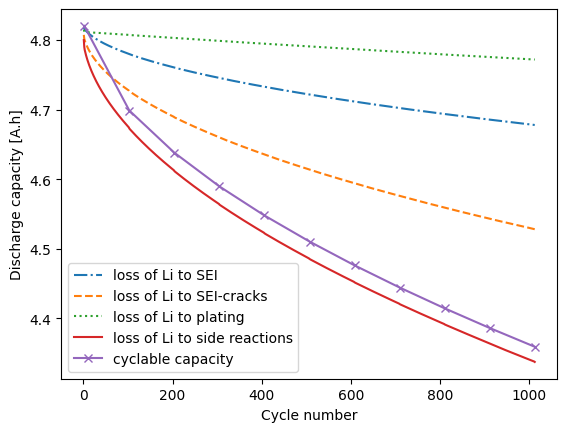

In [9]:
N_cycles_RPT = []
N_cycles_RPT.append(2)
Q_throughput_RPT = []
Q_dis_RPT = []
Qdis = solution1.cycles[1].steps[0]["Discharge capacity [A.h]"].entries
Qdis_delta = Qdis[-1] - Qdis[0]
Q_dis_RPT.append(Qdis_delta)
Qt = solution1.cycles[1].steps[0]["Throughput capacity [A.h]"].entries
Q_throughput_RPT.append(Qt[-1])
for i in range(10):
    Qdis = solution1.cycles[101*i+102].steps[0]["Discharge capacity [A.h]"].entries
    Qdis_delta = Qdis[-1] - Qdis[0]
    Q_dis_RPT.append(Qdis_delta)
    Qt = solution1.cycles[101*i+102].steps[0]["Throughput capacity [A.h]"].entries
    Q_throughput_RPT.append(Qt[-1])
    N_cycles_RPT.append(101*i+103)
plt.figure()
plt.plot(N_cycles, Q_dis_RPT[0]-Q_sei, label="loss of Li to SEI", linestyle="dashdot")
plt.plot(N_cycles, Q_dis_RPT[0]-Q_sei_cracks, label="loss of Li to SEI-cracks", linestyle="dashed")
plt.plot(N_cycles, Q_dis_RPT[0]-Q_plating, label="loss of Li to plating", linestyle="dotted")
plt.plot(N_cycles, Q_dis_RPT[0]-Q_side, label="loss of Li to side reactions")
plt.plot(N_cycles_RPT, Q_dis_RPT, label="cyclable capacity", marker="x")
plt.xlabel("Cycle number")
plt.ylabel("Discharge capacity [A.h]")
plt.legend()
filename = path+'Nonlinear_diffusion_v3.pdf'
plt.savefig(filename,bbox_inches='tight')
plt.show()

In [ ]:
l_cr = []
lcr = solution1.cycles[1]["Negative particle crack length"].entries[-1,-1]
l_cr.append(lcr)
for i in range(2):
    lcr = solution1.cycles[101*i+102]["Negative particle crack length"].entries[-1,-1]
    l_cr.append(lcr)
plt.figure()
plt.plot(N_cycles_RPT,l_cr,marker="x")
plt.xlabel("Cycle number")
plt.ylabel("Negative particle crack length at separator")
plt.show()

In [ ]:
Qdis_zero = solution1.cycles[2]["Discharge capacity [A.h]"].entries
Vdis_zero = solution1.cycles[2]["Terminal voltage [V]"].entries
eta_SEI_avg = solution1.cycles[2]["X-averaged SEI film overpotential [V]"].entries
eta_SEI_sep = solution1.cycles[2]["SEI film overpotential [V]"].entries[-1,:]
eta_SEI_CC = solution1.cycles[2]["SEI film overpotential [V]"].entries[0,:]
cs_neg_avg = solution1.cycles[2]["X-averaged negative particle surface concentration"].entries
cs_neg_sep = solution1.cycles[2]["Negative particle surface concentration"].entries[-1,:]
cs_neg_CC = solution1.cycles[2]["Negative particle surface concentration"].entries[0,:]
cs_pos_avg = solution1.cycles[2]["X-averaged positive particle surface concentration"].entries
cs_pos_sep = solution1.cycles[2]["Positive particle surface concentration"].entries[0,:]
cs_pos_CC = solution1.cycles[2]["Positive particle surface concentration"].entries[-1,:]
U_neg_avg = solution1.cycles[2]["X-averaged negative electrode open circuit potential [V]"].entries
U_neg_sep = solution1.cycles[2]["Negative electrode open circuit potential [V]"].entries[-1,:]
U_neg_CC = solution1.cycles[2]["Negative electrode open circuit potential [V]"].entries[0,:]
U_pos_avg = solution1.cycles[2]["X-averaged positive electrode open circuit potential [V]"].entries
U_pos_sep = solution1.cycles[2]["Positive electrode open circuit potential [V]"].entries[0,:]
U_pos_CC = solution1.cycles[2]["Positive electrode open circuit potential [V]"].entries[-1,:]
phis_neg_avg = solution1.cycles[2]["X-averaged negative electrode potential [V]"].entries
phis_neg_sep = solution1.cycles[2]["Negative electrode potential [V]"].entries[-1,:]
phis_neg_CC = solution1.cycles[2]["Negative electrode potential [V]"].entries[0,:]
phis_pos_avg = solution1.cycles[2]["X-averaged positive electrode potential [V]"].entries
phis_pos_sep = solution1.cycles[2]["Positive electrode potential [V]"].entries[0,:]
phis_pos_CC = solution1.cycles[2]["Positive electrode potential [V]"].entries[-1,:]
phie_neg_avg = solution1.cycles[2]["X-averaged negative electrolyte potential [V]"].entries
phie_neg_sep = solution1.cycles[2]["Negative electrolyte potential [V]"].entries[-1,:]
phie_neg_CC = solution1.cycles[2]["Negative electrolyte potential [V]"].entries[0,:]
phie_pos_avg = solution1.cycles[2]["X-averaged positive electrolyte potential [V]"].entries
phie_pos_sep = solution1.cycles[2]["Positive electrolyte potential [V]"].entries[0,:]
phie_pos_CC = solution1.cycles[2]["Positive electrolyte potential [V]"].entries[-1,:]
ce_neg_avg = solution1.cycles[2]["X-averaged negative electrolyte concentration"].entries
ce_neg_sep = solution1.cycles[2]["Negative electrolyte concentration"].entries[-1,:]
ce_neg_CC = solution1.cycles[2]["Negative electrolyte concentration"].entries[0,:]
ce_pos_avg = solution1.cycles[2]["X-averaged positive electrolyte concentration"].entries
ce_pos_sep = solution1.cycles[2]["Positive electrolyte concentration"].entries[0,:]
ce_pos_CC = solution1.cycles[2]["Positive electrolyte concentration"].entries[-1,:]
M_zero = np.array([Qdis_zero,Vdis_zero,eta_SEI_avg,eta_SEI_sep,eta_SEI_CC,
                    cs_neg_avg,cs_neg_sep,cs_neg_CC,cs_pos_avg,cs_pos_sep,cs_pos_CC,
                    U_neg_avg,U_neg_sep,U_neg_CC,U_pos_avg,U_pos_sep,U_pos_CC,
                    phis_neg_avg,phis_neg_sep,phis_neg_CC,phis_pos_avg,phis_pos_sep,phis_pos_CC,
                    phie_neg_avg,phie_neg_sep,phie_neg_CC,phie_pos_avg,phie_pos_sep,phie_pos_CC,
                    ce_neg_avg,ce_neg_sep,ce_neg_CC,ce_pos_avg,ce_pos_sep,ce_pos_CC,
])
filename_zero = path+'FullyCoupled_reference_zero.txt'
np.savetxt(filename_zero,M_zero,delimiter=",")
Qdis_first = solution1.cycles[5].steps[0]["Discharge capacity [A.h]"].entries
Vdis_first = solution1.cycles[5].steps[0]["Terminal voltage [V]"].entries
eta_SEI_avg = solution1.cycles[5].steps[0]["X-averaged SEI film overpotential [V]"].entries
eta_SEI_sep = solution1.cycles[5].steps[0]["SEI film overpotential [V]"].entries[-1,:]
eta_SEI_CC = solution1.cycles[5].steps[0]["SEI film overpotential [V]"].entries[0,:]
cs_neg_avg = solution1.cycles[5].steps[0]["X-averaged negative particle surface concentration"].entries
cs_neg_sep = solution1.cycles[5].steps[0]["Negative particle surface concentration"].entries[-1,:]
cs_neg_CC = solution1.cycles[5].steps[0]["Negative particle surface concentration"].entries[0,:]
cs_pos_avg = solution1.cycles[5].steps[0]["X-averaged positive particle surface concentration"].entries
cs_pos_sep = solution1.cycles[5].steps[0]["Positive particle surface concentration"].entries[0,:]
cs_pos_CC = solution1.cycles[5].steps[0]["Positive particle surface concentration"].entries[-1,:]
U_neg_avg = solution1.cycles[5].steps[0]["X-averaged negative electrode open circuit potential [V]"].entries
U_neg_sep = solution1.cycles[5].steps[0]["Negative electrode open circuit potential [V]"].entries[-1,:]
U_neg_CC = solution1.cycles[5].steps[0]["Negative electrode open circuit potential [V]"].entries[0,:]
U_pos_avg = solution1.cycles[5].steps[0]["X-averaged positive electrode open circuit potential [V]"].entries
U_pos_sep = solution1.cycles[5].steps[0]["Positive electrode open circuit potential [V]"].entries[0,:]
U_pos_CC = solution1.cycles[5].steps[0]["Positive electrode open circuit potential [V]"].entries[-1,:]
phis_neg_avg = solution1.cycles[5].steps[0]["X-averaged negative electrode potential [V]"].entries
phis_neg_sep = solution1.cycles[5].steps[0]["Negative electrode potential [V]"].entries[-1,:]
phis_neg_CC = solution1.cycles[5].steps[0]["Negative electrode potential [V]"].entries[0,:]
phis_pos_avg = solution1.cycles[5].steps[0]["X-averaged positive electrode potential [V]"].entries
phis_pos_sep = solution1.cycles[5].steps[0]["Positive electrode potential [V]"].entries[0,:]
phis_pos_CC = solution1.cycles[5].steps[0]["Positive electrode potential [V]"].entries[-1,:]
phie_neg_avg = solution1.cycles[5].steps[0]["X-averaged negative electrolyte potential [V]"].entries
phie_neg_sep = solution1.cycles[5].steps[0]["Negative electrolyte potential [V]"].entries[-1,:]
phie_neg_CC = solution1.cycles[5].steps[0]["Negative electrolyte potential [V]"].entries[0,:]
phie_pos_avg = solution1.cycles[5].steps[0]["X-averaged positive electrolyte potential [V]"].entries
phie_pos_sep = solution1.cycles[5].steps[0]["Positive electrolyte potential [V]"].entries[0,:]
phie_pos_CC = solution1.cycles[5].steps[0]["Positive electrolyte potential [V]"].entries[-1,:]
ce_neg_avg = solution1.cycles[5].steps[0]["X-averaged negative electrolyte concentration"].entries
ce_neg_sep = solution1.cycles[5].steps[0]["Negative electrolyte concentration"].entries[-1,:]
ce_neg_CC = solution1.cycles[5].steps[0]["Negative electrolyte concentration"].entries[0,:]
ce_pos_avg = solution1.cycles[5].steps[0]["X-averaged positive electrolyte concentration"].entries
ce_pos_sep = solution1.cycles[5].steps[0]["Positive electrolyte concentration"].entries[0,:]
ce_pos_CC = solution1.cycles[5].steps[0]["Positive electrolyte concentration"].entries[-1,:]
M_first = np.array([Qdis_first,Vdis_first,eta_SEI_avg,eta_SEI_sep,eta_SEI_CC,
                    cs_neg_avg,cs_neg_sep,cs_neg_CC,cs_pos_avg,cs_pos_sep,cs_pos_CC,
                    U_neg_avg,U_neg_sep,U_neg_CC,U_pos_avg,U_pos_sep,U_pos_CC,
                    phis_neg_avg,phis_neg_sep,phis_neg_CC,phis_pos_avg,phis_pos_sep,phis_pos_CC,
                    phie_neg_avg,phie_neg_sep,phie_neg_CC,phie_pos_avg,phie_pos_sep,phie_pos_CC,
                    ce_neg_avg,ce_neg_sep,ce_neg_CC,ce_pos_avg,ce_pos_sep,ce_pos_CC,
])
filename_first = path+'FullyCoupled_reference_first.txt'
np.savetxt(filename_first,M_first,delimiter=",")
Qdis_last = solution1.cycles[total_cycles+4].steps[0]["Discharge capacity [A.h]"].entries
Vdis_last = solution1.cycles[total_cycles+4].steps[0]["Terminal voltage [V]"].entries
eta_SEI_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged SEI film overpotential [V]"].entries
eta_SEI_sep = solution1.cycles[total_cycles+4].steps[0]["SEI film overpotential [V]"].entries[-1,:]
eta_SEI_CC = solution1.cycles[total_cycles+4].steps[0]["SEI film overpotential [V]"].entries[0,:]
cs_neg_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged negative particle surface concentration"].entries
cs_neg_sep = solution1.cycles[total_cycles+4].steps[0]["Negative particle surface concentration"].entries[-1,:]
cs_neg_CC = solution1.cycles[total_cycles+4].steps[0]["Negative particle surface concentration"].entries[0,:]
cs_pos_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged positive particle surface concentration"].entries
cs_pos_sep = solution1.cycles[total_cycles+4].steps[0]["Positive particle surface concentration"].entries[0,:]
cs_pos_CC = solution1.cycles[total_cycles+4].steps[0]["Positive particle surface concentration"].entries[-1,:]
U_neg_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged negative electrode open circuit potential [V]"].entries
U_neg_sep = solution1.cycles[total_cycles+4].steps[0]["Negative electrode open circuit potential [V]"].entries[-1,:]
U_neg_CC = solution1.cycles[total_cycles+4].steps[0]["Negative electrode open circuit potential [V]"].entries[0,:]
U_pos_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged positive electrode open circuit potential [V]"].entries
U_pos_sep = solution1.cycles[total_cycles+4].steps[0]["Positive electrode open circuit potential [V]"].entries[0,:]
U_pos_CC = solution1.cycles[total_cycles+4].steps[0]["Positive electrode open circuit potential [V]"].entries[-1,:]
phis_neg_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged negative electrode potential [V]"].entries
phis_neg_sep = solution1.cycles[total_cycles+4].steps[0]["Negative electrode potential [V]"].entries[-1,:]
phis_neg_CC = solution1.cycles[total_cycles+4].steps[0]["Negative electrode potential [V]"].entries[0,:]
phis_pos_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged positive electrode potential [V]"].entries
phis_pos_sep = solution1.cycles[total_cycles+4].steps[0]["Positive electrode potential [V]"].entries[0,:]
phis_pos_CC = solution1.cycles[total_cycles+4].steps[0]["Positive electrode potential [V]"].entries[-1,:]
phie_neg_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged negative electrolyte potential [V]"].entries
phie_neg_sep = solution1.cycles[total_cycles+4].steps[0]["Negative electrolyte potential [V]"].entries[-1,:]
phie_neg_CC = solution1.cycles[total_cycles+4].steps[0]["Negative electrolyte potential [V]"].entries[0,:]
phie_pos_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged positive electrolyte potential [V]"].entries
phie_pos_sep = solution1.cycles[total_cycles+4].steps[0]["Positive electrolyte potential [V]"].entries[0,:]
phie_pos_CC = solution1.cycles[total_cycles+4].steps[0]["Positive electrolyte potential [V]"].entries[-1,:]
ce_neg_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged negative electrolyte concentration"].entries
ce_neg_sep = solution1.cycles[total_cycles+4].steps[0]["Negative electrolyte concentration"].entries[-1,:]
ce_neg_CC = solution1.cycles[total_cycles+4].steps[0]["Negative electrolyte concentration"].entries[0,:]
ce_pos_avg = solution1.cycles[total_cycles+4].steps[0]["X-averaged positive electrolyte concentration"].entries
ce_pos_sep = solution1.cycles[total_cycles+4].steps[0]["Positive electrolyte concentration"].entries[0,:]
ce_pos_CC = solution1.cycles[total_cycles+4].steps[0]["Positive electrolyte concentration"].entries[-1,:]
M_last = np.array([Qdis_last,Vdis_last,eta_SEI_avg,eta_SEI_sep,eta_SEI_CC,
                    cs_neg_avg,cs_neg_sep,cs_neg_CC,cs_pos_avg,cs_pos_sep,cs_pos_CC,
                    U_neg_avg,U_neg_sep,U_neg_CC,U_pos_avg,U_pos_sep,U_pos_CC,
                    phis_neg_avg,phis_neg_sep,phis_neg_CC,phis_pos_avg,phis_pos_sep,phis_pos_CC,
                    phie_neg_avg,phie_neg_sep,phie_neg_CC,phie_pos_avg,phie_pos_sep,phie_pos_CC,
                    ce_neg_avg,ce_neg_sep,ce_neg_CC,ce_pos_avg,ce_pos_sep,ce_pos_CC,
])
filename_last = path+'FullyCoupled_reference_last.txt'
np.savetxt(filename_last,M_last,delimiter=",")
Qdis_eval = solution1.cycles[total_cycles+5]["Discharge capacity [A.h]"].entries
Vdis_eval = solution1.cycles[total_cycles+5]["Terminal voltage [V]"].entries
eta_SEI_avg = solution1.cycles[total_cycles+5]["X-averaged SEI film overpotential [V]"].entries
eta_SEI_sep = solution1.cycles[total_cycles+5]["SEI film overpotential [V]"].entries[-1,:]
eta_SEI_CC = solution1.cycles[total_cycles+5]["SEI film overpotential [V]"].entries[0,:]
cs_neg_avg = solution1.cycles[total_cycles+5]["X-averaged negative particle surface concentration"].entries
cs_neg_sep = solution1.cycles[total_cycles+5]["Negative particle surface concentration"].entries[-1,:]
cs_neg_CC = solution1.cycles[total_cycles+5]["Negative particle surface concentration"].entries[0,:]
cs_pos_avg = solution1.cycles[total_cycles+5]["X-averaged positive particle surface concentration"].entries
cs_pos_sep = solution1.cycles[total_cycles+5]["Positive particle surface concentration"].entries[0,:]
cs_pos_CC = solution1.cycles[total_cycles+5]["Positive particle surface concentration"].entries[-1,:]
U_neg_avg = solution1.cycles[total_cycles+5]["X-averaged negative electrode open circuit potential [V]"].entries
U_neg_sep = solution1.cycles[total_cycles+5]["Negative electrode open circuit potential [V]"].entries[-1,:]
U_neg_CC = solution1.cycles[total_cycles+5]["Negative electrode open circuit potential [V]"].entries[0,:]
U_pos_avg = solution1.cycles[total_cycles+5]["X-averaged positive electrode open circuit potential [V]"].entries
U_pos_sep = solution1.cycles[total_cycles+5]["Positive electrode open circuit potential [V]"].entries[0,:]
U_pos_CC = solution1.cycles[total_cycles+5]["Positive electrode open circuit potential [V]"].entries[-1,:]
phis_neg_avg = solution1.cycles[total_cycles+5]["X-averaged negative electrode potential [V]"].entries
phis_neg_sep = solution1.cycles[total_cycles+5]["Negative electrode potential [V]"].entries[-1,:]
phis_neg_CC = solution1.cycles[total_cycles+5]["Negative electrode potential [V]"].entries[0,:]
phis_pos_avg = solution1.cycles[total_cycles+5]["X-averaged positive electrode potential [V]"].entries
phis_pos_sep = solution1.cycles[total_cycles+5]["Positive electrode potential [V]"].entries[0,:]
phis_pos_CC = solution1.cycles[total_cycles+5]["Positive electrode potential [V]"].entries[-1,:]
phie_neg_avg = solution1.cycles[total_cycles+5]["X-averaged negative electrolyte potential [V]"].entries
phie_neg_sep = solution1.cycles[total_cycles+5]["Negative electrolyte potential [V]"].entries[-1,:]
phie_neg_CC = solution1.cycles[total_cycles+5]["Negative electrolyte potential [V]"].entries[0,:]
phie_pos_avg = solution1.cycles[total_cycles+5]["X-averaged positive electrolyte potential [V]"].entries
phie_pos_sep = solution1.cycles[total_cycles+5]["Positive electrolyte potential [V]"].entries[0,:]
phie_pos_CC = solution1.cycles[total_cycles+5]["Positive electrolyte potential [V]"].entries[-1,:]
ce_neg_avg = solution1.cycles[total_cycles+5]["X-averaged negative electrolyte concentration"].entries
ce_neg_sep = solution1.cycles[total_cycles+5]["Negative electrolyte concentration"].entries[-1,:]
ce_neg_CC = solution1.cycles[total_cycles+5]["Negative electrolyte concentration"].entries[0,:]
ce_pos_avg = solution1.cycles[total_cycles+5]["X-averaged positive electrolyte concentration"].entries
ce_pos_sep = solution1.cycles[total_cycles+5]["Positive electrolyte concentration"].entries[0,:]
ce_pos_CC = solution1.cycles[total_cycles+5]["Positive electrolyte concentration"].entries[-1,:]
M_eval = np.array([Qdis_eval,Vdis_eval,eta_SEI_avg,eta_SEI_sep,eta_SEI_CC,
                    cs_neg_avg,cs_neg_sep,cs_neg_CC,cs_pos_avg,cs_pos_sep,cs_pos_CC,
                    U_neg_avg,U_neg_sep,U_neg_CC,U_pos_avg,U_pos_sep,U_pos_CC,
                    phis_neg_avg,phis_neg_sep,phis_neg_CC,phis_pos_avg,phis_pos_sep,phis_pos_CC,
                    phie_neg_avg,phie_neg_sep,phie_neg_CC,phie_pos_avg,phie_pos_sep,phie_pos_CC,
                    ce_neg_avg,ce_neg_sep,ce_neg_CC,ce_pos_avg,ce_pos_sep,ce_pos_CC,
])
filename_eval = path+'FullyCoupled_reference_eval.txt'
np.savetxt(filename_eval,M_eval,delimiter=",")

In [ ]:
fig, ax = plt.subplots()
ax.plot(Qdis_zero,Vdis_zero,label="0.1C discharge at start")
ax.plot(Qdis_first,Vdis_first,label="First discharge",linestyle="dashed")
ax.plot(Qdis_last,Vdis_last,label="Last discharge",linestyle="dashdot")
ax.plot(Qdis_eval,Vdis_eval,label="0.1C discharge at end",linestyle="dotted")
ax.set_xlabel("Discharge capacity [A.h]")
ax.set_ylabel("Terminal voltage [V]")
ax.legend()
filename = path+"FullyCoupled_ZFLE.pdf"
plt.savefig(filename)
plt.show()